In [1]:
import tensorflow as tf

In [2]:
mnist = tf.keras.datasets.mnist

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

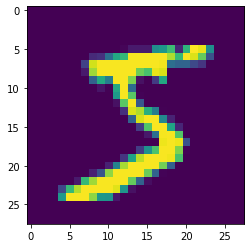

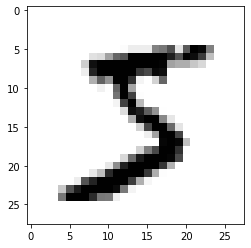

In [4]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0])
plt.show()
plt.imshow(x_train[0], cmap=plt.cm.binary)

In [5]:
print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

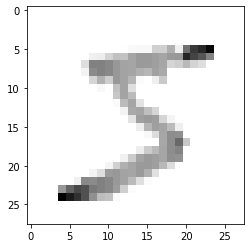

In [6]:
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)
plt.imshow(x_train[0], cmap=plt.cm.binary)

In [7]:
print(x_train[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [8]:
print(y_train[0])

5


In [9]:
import numpy as np
img_size=28
x_trainr = np.array(x_train).reshape(-1, img_size, img_size, 1)
x_testr = np.array(x_test).reshape(-1, img_size, img_size, 1)
print("Training sample Dimension", x_trainr.shape)
print("Testing sample Dimension", x_testr.shape)

Training sample Dimension (60000, 28, 28, 1)
Testing sample Dimension (10000, 28, 28, 1)


In [10]:
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, Activation

In [11]:
model = Sequential()

model.add(Conv2D(64, (3, 3), input_shape = x_trainr.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation("relu"))

model.add(Dense(32))
model.add(Activation("relu"))

model.add(Dense(10))
model.add(Activation("softmax"))


In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 activation (Activation)     (None, 26, 26, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 activation_1 (Activation)   (None, 11, 11, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                    

In [13]:
print("Total training samples = ", len(x_trainr))

Total training samples =  60000


In [14]:
model.compile(loss="sparse_categorical_crossentropy", optimizer= "adam", metrics=['accuracy'])

In [15]:
model.fit(x_trainr, y_train, epochs=5, validation_split=0.3)

Epoch 1/5
1313/1313 [==============================] - 94s 70ms/step - loss: 0.3480 - accuracy: 0.8910 - val_loss: 0.1270 - val_accuracy: 0.9618
Epoch 2/5
1313/1313 [==============================] - 91s 70ms/step - loss: 0.1090 - accuracy: 0.9665 - val_loss: 0.0990 - val_accuracy: 0.9692
Epoch 3/5
1313/1313 [==============================] - 91s 69ms/step - loss: 0.0790 - accuracy: 0.9763 - val_loss: 0.0750 - val_accuracy: 0.9771
Epoch 4/5
1313/1313 [==============================] - 80s 61ms/step - loss: 0.0622 - accuracy: 0.9803 - val_loss: 0.0852 - val_accuracy: 0.9747
Epoch 5/5
1313/1313 [==============================] - 78s 59ms/step - loss: 0.0519 - accuracy: 0.9833 - val_loss: 0.0675 - val_accuracy: 0.9806


In [16]:
test_loss, test_acc = model.evaluate(x_testr, y_test)
print("Test loss on 10,000 test samples", test_loss)
print("Validation Accuracy on 10,000 test samples", test_acc)


313/313 [==============================] - 6s 18ms/step - loss: 0.0627 - accuracy: 0.9802
Test loss on 10,000 test samples 0.06266516447067261
Validation Accuracy on 10,000 test samples 0.9801999926567078


In [17]:
predictions = model.predict([x_testr])

In [18]:
print(predictions)

[[3.3341854e-07 2.5285408e-04 1.6092958e-05 ... 9.9972123e-01
  2.0658298e-08 1.5880363e-06]
 [3.2160745e-04 4.2341999e-06 9.9959689e-01 ... 3.1586424e-05
  3.2645261e-05 1.0733828e-06]
 [1.1393163e-06 9.9971026e-01 2.1478159e-05 ... 1.7960192e-05
  2.0830772e-05 5.0677441e-05]
 ...
 [7.2491735e-10 6.2839456e-07 4.6020077e-09 ... 1.3400043e-07
  2.4779126e-06 8.4048486e-05]
 [4.7660360e-05 9.4028923e-07 2.7917058e-10 ... 1.8175049e-07
  4.4041881e-06 8.3691893e-06]
 [9.7863534e-03 1.7031003e-05 4.0373133e-04 ... 6.8385916e-06
  8.4596593e-04 9.1456423e-05]]


In [19]:
print(np.argmax(predictions[4]))

4


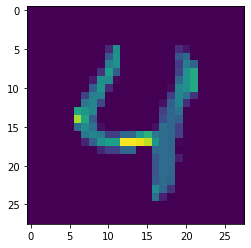

In [20]:
plt.imshow(x_test[4])

In [29]:
print(np.argmax(predictions[129]))

5


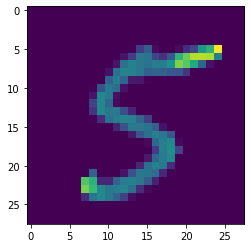

In [30]:
plt.imshow(x_test[129])

In [23]:
import cv2

In [59]:
img = cv2.imread('/home/govind/Downloads/six.png')

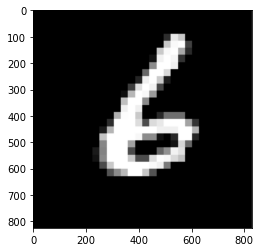

In [60]:
plt.imshow(img)

In [61]:
img.shape

(825, 829, 3)

In [62]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [63]:
gray.shape

(825, 829)

In [64]:
resize = cv2.resize(gray, (28, 28), interpolation = cv2.INTER_AREA)

In [65]:
resize.shape

(28, 28)

In [66]:
newimg = tf.keras.utils.normalize(resize, axis=1)

In [67]:
newimg = np.array(newimg).reshape(-1, img_size, img_size, 1)

In [68]:
newimg.shape

(1, 28, 28, 1)

In [69]:
predictions = model.predict(newimg)

In [70]:
print(np.argmax(predictions))

6
